### Множественные субграфики

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

#### plt.axes: создание субграфиков вручную

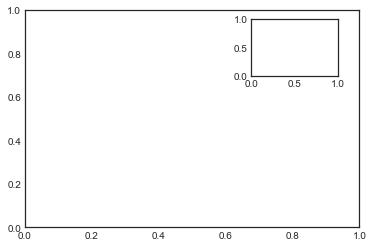

In [2]:
ax1 = plt.axes() # обычные оси
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) # 65% от осей и по 20% размер субграфика

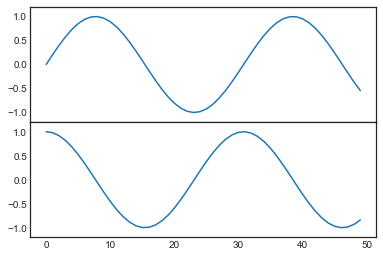

In [3]:
# в объектно-ориентированном варианте
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels = [], ylim = (-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim = (-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

#### plt.subplot: простые сетки субграфиков

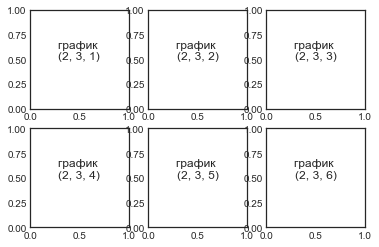

In [4]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5, 0.5, 'график \n'+str((2,3,i)),# 0.5 - положение в центре
            fontsize=12, ha='center')

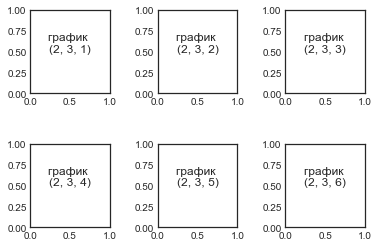

In [5]:
# настроим размеры полей между графиками
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.6) # поля по 60% от высоты и ширины субграфика
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5, 0.5, 'график \n'+str((2,3,i)),# 0.5 - положение в центре
            fontsize=12, ha='center')

#### Функция plt.subplots: создание всей сетки за 1 раз

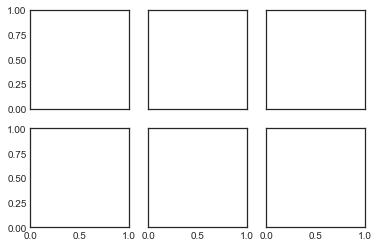

In [6]:
fig, ax = plt.subplots(2,3, sharex='col', sharey='row') # шкала координат по оси x и по y у всех одинаковая
# sharex sharey удаляют внутренние метки между графиками

In [7]:
# системы координат пишутся в массив
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001797CBF4978>,
      dtype=object)

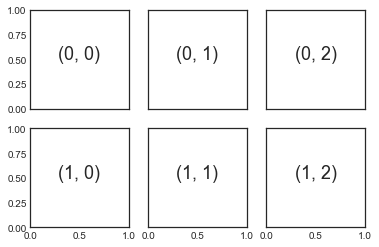

In [8]:
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5, 0.5, str((i,j)), 
                    fontsize=18, ha='center')
fig

#### Функция plt.GridSpec: более сложные конфигурации

In [9]:
grid = plt.GridSpec(2,3, wspace=0.4, hspace=0.3) # 2 строки 3 столбца
grid

GridSpec(2, 3)

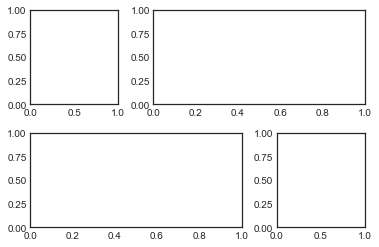

In [10]:
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2])

In [11]:
# задаем нормально распределенные данные
mean = [0,0]
cov = [[1,1], [1,2]]
x,y = np.random.multivariate_normal(mean, cov, 3000).T

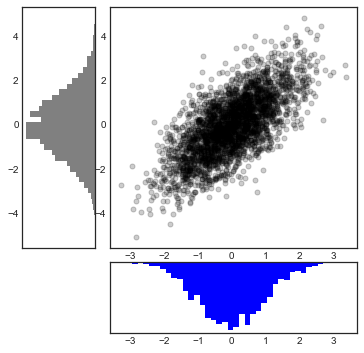

In [12]:
# задаем системы координат с помощью функции GridSpec
fig = plt.figure(figsize = (6,6))
grid = plt.GridSpec(4,4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1,0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1,1:], yticklabels=[], sharex=main_ax)

# распределяем точки по основной системе координат
main_ax.plot(x,y, 'ok', markersize=5, alpha=0.2)

# рисуем гистограммы на доп системах координат
x_hist.hist(x,40, histtype='stepfilled',
           orientation='vertical', color='blue')
x_hist.invert_yaxis()

y_hist.hist(y,40, histtype='stepfilled',
           orientation='horizontal', color='gray')
y_hist.invert_xaxis()

### Текст и поясняющие надписи

In [13]:
import matplotlib as mpl
import pandas as pd

##### Пример: влияние выходных дней на рождение детей в США

In [14]:
births = pd.read_csv('./data/births.csv')

In [15]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [16]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

In [17]:
quartiles

array([4358. , 4814. , 5289.5])

In [18]:
sig

689.31

In [19]:
mu

4814.0

In [20]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [21]:
births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

In [22]:
births.index

DatetimeIndex(['1969-01-01', '1969-01-01', '1969-01-02', '1969-01-02',
               '1969-01-03', '1969-01-03', '1969-01-04', '1969-01-04',
               '1969-01-05', '1969-01-05',
               ...
               '1988-12-27', '1988-12-27', '1988-12-28', '1988-12-28',
               '1988-12-29', '1988-12-29', '1988-12-30', '1988-12-30',
               '1988-12-31', '1988-12-31'],
              dtype='datetime64[ns]', length=14610, freq=None)

In [23]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


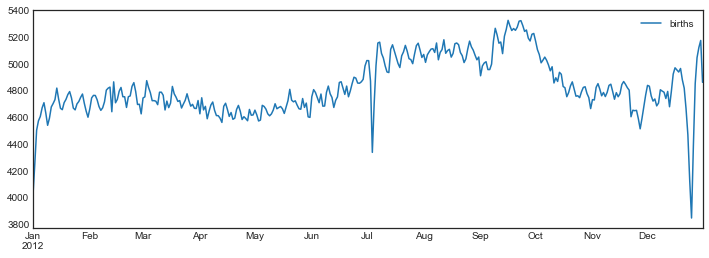

In [24]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax);

''

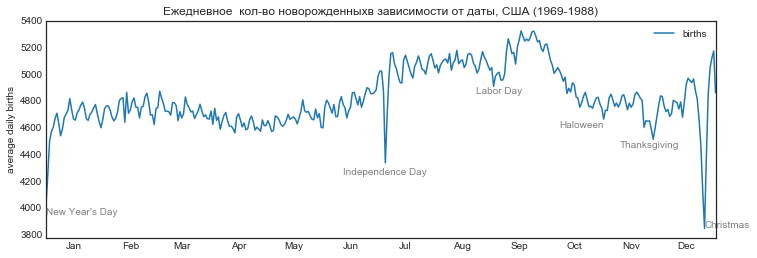

In [25]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

# добавляем метки на график
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style) # ha - horizontal alignment (выравнивание по горизонтали)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Haloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas", ha='left', **style)

#Добравляем метки для осей координат
ax.set(title='Ежедневное  кол-во новорожденныхв зависимости от даты, США (1969-1988)', 
       ylabel='average daily births')

#Размечаем ось х центрированными метками для месяцев
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

;

In [26]:
style

{'size': 10, 'color': 'gray'}

#### Преобразования и координаты текста

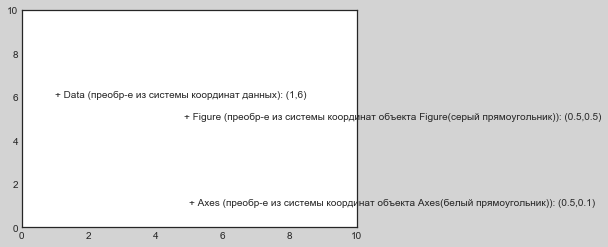

In [41]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])
ax.text(1, 6, "+ Data (преобр-е из системы координат данных): (1,6)", transform=ax.transData)
ax.text(0.5, 0.1, "+ Axes (преобр-е из системы координат объекта Axes(белый прямоугольник)): (0.5,0.1)", transform=ax.transAxes)
ax.text(0.5, 0.5, "+ Figure (преобр-е из системы координат объекта Figure(серый прямоугольник)): (0.5,0.5)", transform=fig.transFigure);

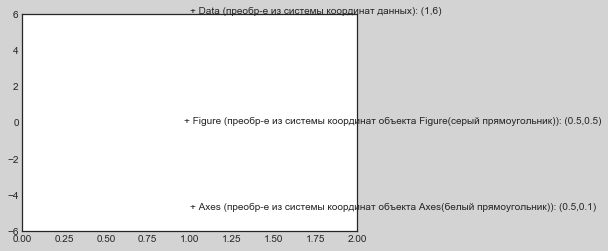

In [42]:
# попробуем поменять пределы осей, это повлияет только на transData
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])
ax.text(1, 6, "+ Data (преобр-е из системы координат данных): (1,6)", transform=ax.transData)
ax.text(0.5, 0.1, "+ Axes (преобр-е из системы координат объекта Axes(белый прямоугольник)): (0.5,0.1)", transform=ax.transAxes)
ax.text(0.5, 0.5, "+ Figure (преобр-е из системы координат объекта Figure(серый прямоугольник)): (0.5,0.5)", transform=fig.transFigure)
ax.set_xlim(0,2)
ax.set_ylim(-6,6)

fig;

### Стрелки и поясняющие надписи

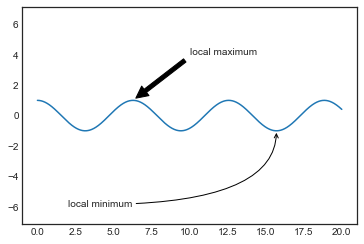

In [46]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28,1), xytext=(10,4),
           arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5*np.pi,-1), xytext=(2,-6),
           arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));

Стили стрелок можно задавать словарем arrowprops. См. документацию

''

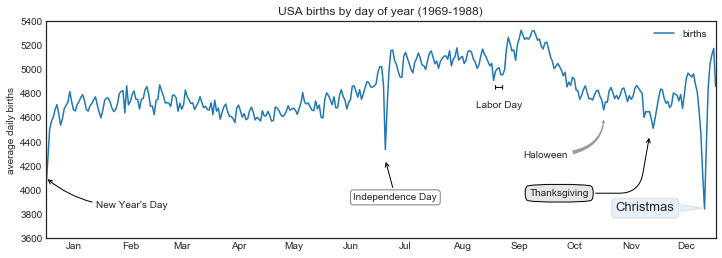

In [60]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

# добавляем метки на график
#style = dict(size=10, color='gray')

ax.annotate("New Year's Day", xy=('2012-1-1',4100), xycoords='data',
           xytext=(50,-30), textcoords='offset points',
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4',4250), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10,-40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate("Labor Day", xy=('2012-9-4',4850), xycoords='data', ha='center',
            xytext=(0,-20), textcoords='offset points')

ax.annotate("", xy=('2012-9-1',4850), xytext=('2012-9-7',4850), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2',})

ax.annotate("Haloween", xy=('2012-10-31',4600), xycoords='data',
            xytext=(-80,-40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                           fc="0.6", ec="none",
                           connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate("Thanksgiving", xy=('2012-11-25',4450), xycoords='data',
            xytext=(-120,-60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc='0.9'),
            arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate("Christmas", xy=('2012-12-25',3850), xycoords='data',
            xytext=(-30,0), textcoords='offset points',
            size=13, ha='right', va="center",
            bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge, tail_width=0.5",
                            alpha=0.1))

# задаем метки осей координат
ax.set(title='USA births by day of year (1969-1988)',
      ylabel='average daily births')

# разметим ось Х центрированными метками длля месяцев
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

ax.set_ylim(3600, 5400)
;

#### Пользовательские настройки делений на осях координат

##### Основные и промежуточные деления осей координат

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


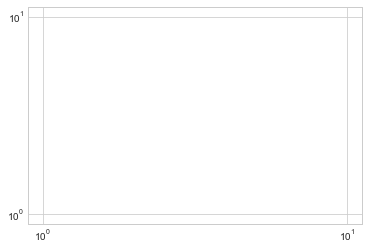

In [65]:
ax = plt.axes(xscale='log', yscale='log')

In [66]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [67]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

##### Прячем деления и/или метки

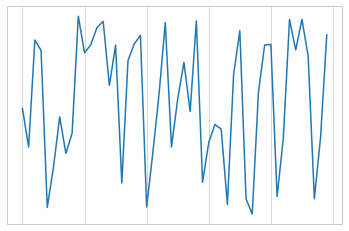

In [72]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

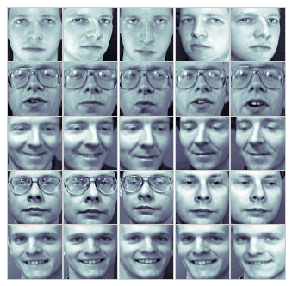

In [80]:
fig, ax = plt.subplots(5,5,figsize=(5,5))
fig.subplots_adjust(hspace=0, wspace=0)

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10*i + j], cmap="bone")

##### Уменьшение или увеличение кол-ва делений

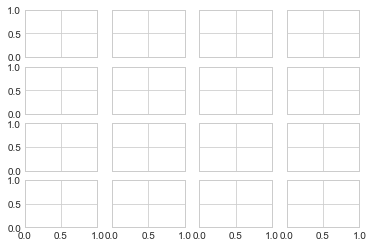

In [81]:
fig, ax = plt.subplots(4,4,sharex=True, sharey=True)

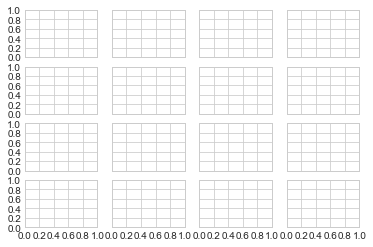

In [85]:
# plt.MaxNLocator задает макс. кол-во отображаемых делений
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))
    axi.yaxis.set_major_locator(plt.MaxNLocator(5))
fig

#### Более экзотические форматы делений

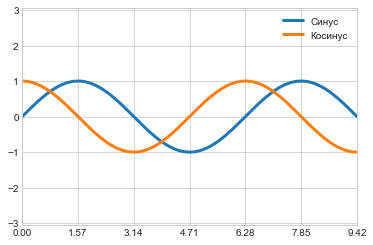

In [93]:
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi,1000)
ax.plot(x, np.sin(x), lw=3, label='Синус')
ax.plot(x, np.cos(x), lw=3, label='Косинус')

# настроим сетку, легенду и зададим пределы осей
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0,3*np.pi)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))
fig;

In [109]:
# нужна пользовательская функция для переименования меток в кратные пи
def format_func(value, tick_number):
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return '0'
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N//2)

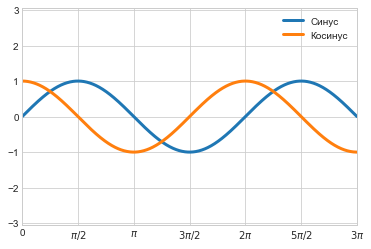

In [110]:
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig